In [25]:
import numpy as np
import pandas as pd

In [27]:
__author__ = 'Chris Potts'


class RSA:
    """Implementation of the core Rational Speech Acts model.

    Parameters
    ----------
    lexicon : `np.array` or `pd.DataFrame`
        Messages along the rows, states along the columns.
    prior : array-like
        Same length as the number of colums in `lexicon`.
    costs : array-like
        Same length as the number of rows in `lexicon`.
    alpha : float
        The temperature parameter. Default: 1.0
    """
    def __init__(self, lexicon, prior, costs, alpha=1.0):
        self.lexicon = lexicon
        self.prior = np.array(prior)
        self.costs = np.array(costs)
        self.alpha = alpha

    def literal_listener(self):
        """Literal listener predictions, which corresponds intuitively
        to truth conditions with priors.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to messages, the columns to states.

        """
        return rownorm(self.lexicon * self.prior)

    def speaker(self):
        """Returns a matrix of pragmatic speaker predictions.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to states, the columns to states.
        """
        lit = self.literal_listener().T
        utilities = self.alpha * (safelog(lit) + self.costs)
        return rownorm(np.exp(utilities))

    def listener(self):
        """Returns a matrix of pragmatic listener predictions.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to messages, the columns to states.
        """
        spk = self.speaker().T
        return rownorm(spk * self.prior)


def rownorm(mat):
    """Row normalization of np.array or pd.DataFrame"""
    return (mat.T / mat.sum(axis=1)).T


def safelog(vals):
    """Silence distracting warnings about log(0)."""
    with np.errstate(divide='ignore'):
        return np.log(vals)


if __name__ == '__main__':
    """Examples"""

    from IPython.display import display


    def display_reference_game(mod):
        d = mod.lexicon.copy()
        d['costs'] = mod.costs
        d.loc['prior'] = list(mod.prior) + [""]
        d.loc['alpha'] = [mod.alpha] + [" "] * mod.lexicon.shape[1]
        display(d)

## Задание 3.2

Как поменяется импликатура, если поменять исходные вероятности на P(r1) = 0.1, P(r2) = P(r3) = 0.45? Приведите соответствующую таблицу распределения вероятностей для прагматического слушающего и прокомментируйте её.

(комментарий в pdf-е)

In [34]:
    # Core lexicon:
    msgs = ['hat', 'glasses', 'mustache']
    states = ['r1', 'r2', 'r3']
    lex = pd.DataFrame([
        [1.0, 1.0, 0.0],
        [0.0, 0.0, 1.0],
        [0.0, 1.0, 0.0]], index=msgs, columns=states)
    
    basic_mod = RSA(lexicon=lex, prior=[0.1, 0.45, 0.45], costs=[0.0, 0.0, 0.0])
    
    print("Распределение вероятностей для прагматического слушателя:")
    display(basic_mod.listener())

Распределение вероятностей для прагматического слушателя:


,r1,r2,r3
hat,0.330579,0.669421,0.0
glasses,0.000000,0.000000,1.0
mustache,0.000000,1.000000,0.0


## Задание 4.1

Приведите свой пример референциальной игры с четырьмя объектами (состояниями, r1, r2, r3, r4) и четырьмя высказываниями (m1, m2, m3, m4), в которой при равных исходных вероятностях объектов, alpha = 1, цене всех высказываний равной 0 вычисляется одна или две скалярные импликатуры. Покажите, что импликатуры вычисляются (таблица для прагматического слушающего + комментарий, описывающий импликатуру).

(коментарии в pdf-е)

In [35]:
    # Core lexicon:
    msgs = ['блондин', 'брюнет', 'очки', 'сережка']
    states = ['r1', 'r2', 'r3', 'r4']
    lex = pd.DataFrame([
        [1.0, 1.0, 0.0, 0.0],
        [0.0, 0.0, 1.0, 1.0],
        [0.0, 1.0, 0.0, 0.0],
        [0.0, 0.0, 1.0, 0.0]], index=msgs, columns=states)
    
    basic_mod = RSA(lexicon=lex, prior=[0.25, 0.25, 0.25, 0.25], costs=[0.0, 0.0, 0.0, 0.0])    
    
    print("Распределение вероятностей для прагматического слушателя:")
    display(basic_mod.listener())

Распределение вероятностей для прагматического слушателя:


,r1,r2,r3,r4
блондин,0.75,0.25,0.00,0.00
брюнет,0.00,0.00,0.25,0.75
очки,0.00,1.00,0.00,0.00
сережка,0.00,0.00,1.00,0.00


## Задание 4.2

Как меняются вероятности для прагматического слушающего с изменением параметра alpha (оптимальность, прагматичность, рациональность говорящего), параметра цены высказывания, с изменением исходных (априорных) вероятностей объектов? При каких значениях параметров импликатура (или импликатуры, если в Вашей игре их несколько) исчезает?

### Изменение параметра alpha

Параметр alpha отвечает за оптимальность и прагматичность говорящего. Чем выше этот параметр, тем прагматичнее говорящий. Увеличение alpha приводит к уменьшению неопределенности в случае неоднозначности. Уже при alpha=4 можно наблюдать почти полное исчезновение ипмликатур для высказываний "блондин" и "брюнет": 

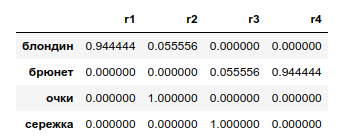

In [54]:
    for i in range(1, 6):
        alpha_mod = RSA(lexicon=lex, prior=[0.25, 0.25, 0.25, 0.25], costs=[0.0, 0.0, 0.0, 0.0], alpha=i)
        print(f"Распределение вероятностей для прагматического слушателя при alpha={i}:")
        display(alpha_mod.listener())

Распределение вероятностей для прагматического слушателя при alpha=1:


,r1,r2,r3,r4
блондин,0.75,0.25,0.00,0.00
брюнет,0.00,0.00,0.25,0.75
очки,0.00,1.00,0.00,0.00
сережка,0.00,0.00,1.00,0.00


Распределение вероятностей для прагматического слушателя при alpha=2:


,r1,r2,r3,r4
блондин,0.833333,0.166667,0.000000,0.000000
брюнет,0.000000,0.000000,0.166667,0.833333
очки,0.000000,1.000000,0.000000,0.000000
сережка,0.000000,0.000000,1.000000,0.000000


Распределение вероятностей для прагматического слушателя при alpha=3:


,r1,r2,r3,r4
блондин,0.9,0.1,0.0,0.0
брюнет,0.0,0.0,0.1,0.9
очки,0.0,1.0,0.0,0.0
сережка,0.0,0.0,1.0,0.0


Распределение вероятностей для прагматического слушателя при alpha=4:


,r1,r2,r3,r4
блондин,0.944444,0.055556,0.000000,0.000000
брюнет,0.000000,0.000000,0.055556,0.944444
очки,0.000000,1.000000,0.000000,0.000000
сережка,0.000000,0.000000,1.000000,0.000000


Распределение вероятностей для прагматического слушателя при alpha=5:


,r1,r2,r3,r4
блондин,0.970588,0.029412,0.000000,0.000000
брюнет,0.000000,0.000000,0.029412,0.970588
очки,0.000000,1.000000,0.000000,0.000000
сережка,0.000000,0.000000,1.000000,0.000000


### Изменение распределения априорных вероятностей

Исходная вероятность P(r) отвечает за то, какой объект говорящий будет выбирать в целом. Изменяя вероятность P(r), можно повышать "важность" определенных объектов. Например, распределение вероятностей [0.01, 1.0, 0.5, 0.5]
означает, что говорящий будет очень часто говорить об объекте r2, и почти никогда не будет говорить об объекте r1. 

При таком распределении исчезает импликатура для фаразы "блондин", так как для этого свойства слушатель однозначно будет определять объект r2.

Чтобы исчезли обе имликатуры, необходимо завысить априорные вероятности для объектов r2 и r3, а для остальных, наоборот, занизить:

[0.01, 1.0, 1.0, 0.01]

In [76]:
# завысим вероятность для r2, а для r1 занизим
basic_mod = RSA(lexicon=lex, prior=[0.01, 1.0, 0.5, 0.5], costs=[0, 0, 0, 0])    
    
print("Распределение вероятностей для прагматического слушателя:")
display(basic_mod.listener())

# завысим вероятности для r2 и r3
basic_mod = RSA(lexicon=lex, prior=[0.01, 1.0, 1.0, 0.01], costs=[0, 0, 0, 0])    
    
print("Распределение вероятностей для прагматического слушателя:")
display(basic_mod.listener())

Распределение вероятностей для прагматического слушателя:


,r1,r2,r3,r4
блондин,0.019704,0.980296,0.00,0.00
брюнет,0.000000,0.000000,0.25,0.75
очки,0.000000,1.000000,0.00,0.00
сережка,0.000000,0.000000,1.00,0.00


Распределение вероятностей для прагматического слушателя:


,r1,r2,r3,r4
блондин,0.019704,0.980296,0.000000,0.000000
брюнет,0.000000,0.000000,0.980296,0.019704
очки,0.000000,1.000000,0.000000,0.000000
сережка,0.000000,0.000000,1.000000,0.000000
